# X Account Data
### for @bodhichristian

This notebook is an exploration of X user and post data using pandas, numpy, and matplotlib to gain useful insights.

CSVs in current directory:  
- <b>account_overview_year.csv</b> - 365 days of account-related data such as Likes, New follows, and Profile visits  
- <b>account_content_quarter.csv</b> - 3 months of post-related data such as Post Id, Post text, and Engagements  

In [92]:
## Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [93]:
## Create dataframes and merge

overview = pd.read_csv('overview_4W.csv')
posts = pd.read_csv('posts_4W.csv')

### Format dates

In [94]:
# %a - abbreviated weekday name ('Mon')
# %b - abbreviated month name ('Feb')
# %d - day of the month ('25')
# %Y - four digit year (2025)

overview['Date'] = pd.to_datetime(overview['Date'], format='%a, %b %d, %Y')
posts['Date'] = pd.to_datetime(posts['Date'], format='%a %b %d %Y')

### Merge data

In [95]:
merged = overview.merge(posts, how='left', on='Date', suffixes=['_o', '_p'])
merged.head()

,Date,Impressions_o,Likes_o,Engagements_o,Bookmarks_o,Shares,New follows_o,Unfollows,Replies_o,Reposts_o,...,Bookmarks_p,Share,New follows_p,Replies_p,Reposts_p,Profile visits_p,Detail expands,Url clicks,Hashtag clicks,Permalink clicks
0,2025-02-27,142,1,5,0,0,1,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-02-26,273,1,3,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-02-25,1627,7,22,1,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-02-25,1627,7,22,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-02-25,1627,7,22,1,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,0.0,0.0


In [101]:
merged.to_csv('merged.csv')

### Add datetime helper values

In [103]:
merged['Month'] = pd.Categorical(
    merged['Date'].dt.strftime('%b'),
    categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True
)

merged['Week number'] = (merged['Date'] - merged['Date'].min()).dt.days // 7 + 1

merged['Weekday'] = pd.Categorical(
    merged['Date'].dt.strftime('%a'),
    categories=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],
    ordered=True
)

# order chronologically

merged = merged[::-1]
merged[['Date', 'Month', 'Week number', 'Weekday']]

,Date,Month,Week number,Weekday
86,2025-01-31,Jan,1,Fri
85,2025-01-31,Jan,1,Fri
84,2025-01-31,Jan,1,Fri
83,2025-01-31,Jan,1,Fri
82,2025-01-31,Jan,1,Fri
...,...,...,...,...
4,2025-02-25,Feb,4,Tue
3,2025-02-25,Feb,4,Tue
2,2025-02-25,Feb,4,Tue
1,2025-02-26,Feb,4,Wed


### Convert header values to snake case

In [118]:
def snake_case(text):
    snake_cased = []
    for i, char in enumerate(text):
        if char.isupper():
            if snake_cased and snake_cased[-1] != '_': 
                snake_cased.append('_')
            snake_cased.append(char.lower())
        elif char == ' ':
            if snake_cased and snake_cased[-1] != '_':
                snake_cased.append('_')
        else:
            snake_cased.append(char)
    
    return ''.join(snake_cased)
    
print(snake_case('Cool Metric'))

cool_metric


In [119]:
merged.columns = [snake_case(col) for col in merged.columns]
merged

,date,impressions_o,likes_o,engagements_o,bookmarks_o,shares,new_follows_o,unfollows,replies_o,reposts_o,...,replies_p,reposts_p,profile_visits_p,detail_expands,url_clicks,hashtag_clicks,permalink_clicks,month,week_number,weekday
86,2025-01-31,1749,20,69,0,0,2,0,3,0,...,2.0,0.0,17.0,24.0,0.0,0.0,0.0,Jan,1,Fri
85,2025-01-31,1749,20,69,0,0,2,0,3,0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,Jan,1,Fri
84,2025-01-31,1749,20,69,0,0,2,0,3,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Jan,1,Fri
83,2025-01-31,1749,20,69,0,0,2,0,3,0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Jan,1,Fri
82,2025-01-31,1749,20,69,0,0,2,0,3,0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,Jan,1,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-02-25,1627,7,22,1,0,0,0,1,0,...,1.0,0.0,4.0,5.0,0.0,0.0,0.0,Feb,4,Tue
3,2025-02-25,1627,7,22,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Feb,4,Tue
2,2025-02-25,1627,7,22,1,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Feb,4,Tue
1,2025-02-26,273,1,3,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Feb,4,Wed


### Post Performance (1 Year)

In [98]:
replies = overview['Replies'].sum()
likes = overview['Likes'].sum()
reposts = overview['Reposts'].sum()
bookmarks = overview['Bookmarks'].sum()
shares = overview['Shares'].sum()

print(f'Replies: {replies}')
print(f'Likes: {likes}')
print(f'Reposts: {reposts}')
print(f'Bookmarks: {bookmarks}')
print(f'Shares: {shares}')

Replies: 52
Likes: 1405
Reposts: 59
Bookmarks: 805
Shares: 24


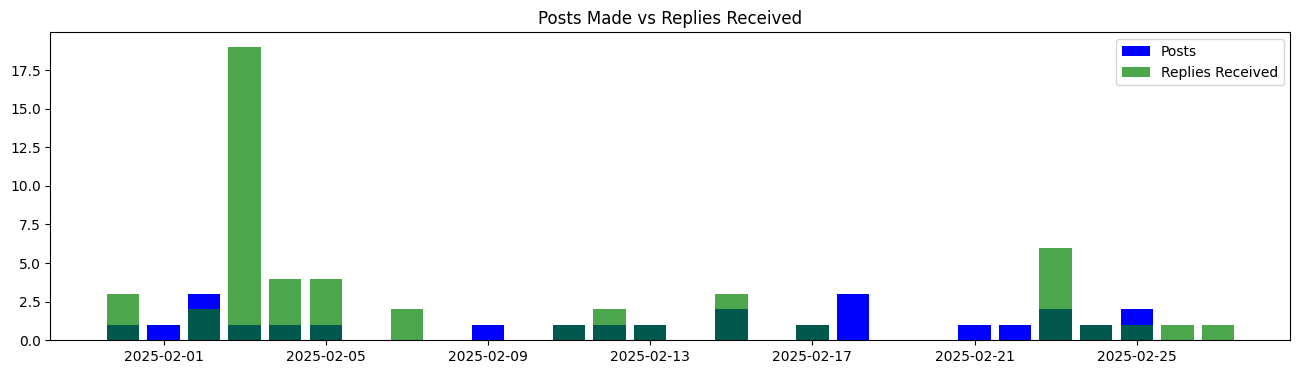

Average replies received per post: 2


In [99]:
x = overview['Date']
y_posts = overview['Create Post']
y_replies = overview['Replies']

plt.figure(figsize=(16,4))
plt.title('Posts Made vs Replies Received')
plt.bar(x, y_posts, color='blue', label='Posts')
plt.bar(x, y_replies, color='green', alpha=0.7, label='Replies Received')
plt.legend()
plt.show()

reply_rate = round(y_replies.sum() / y_posts.sum())
print(f'Average replies received per post: {reply_rate}')

In [100]:
monthly_impressions = overview.groupby('Month', observed=True)['Impressions'].sum()

plt.figure(figsize=(16, 4))  
plt.title('Impressions by Month')
plt.bar(monthly_impressions.index, monthly_impressions.values)
plt.show()

KeyError: 'Month'

## Engagement

In [ ]:
total_impressions = overview['Impressions'].sum()
total_engagements = overview['Engagements'].sum()

engagement_rate = round((total_engagements / total_impressions * 100), 1)
print(f'Impressions: {total_impressions}')
print(f'Engagements: {total_engagements}')
print(f'Engagement rate: {engagement_rate}%')

### Avg Enagement per Impression

In [ ]:
avg_daily_engagement = (overview['Engagements'] / overview['Impressions']).mean() * 100
print(f'Average daily engagment: {avg_daily_engagement.round(1)}')

### Monthly Engagement

In [ ]:
monthly_engagements = overview.groupby('Month', observed=True)['Engagements'].sum()

plt.figure(figsize=(16, 4))  
plt.title('Engagement by Month')
plt.bar(monthly_engagements.index, monthly_engagements.values, color='green')
plt.show()

### Monthly Impresssions

### Posts vs Replies Receieved

### Profile Visist

In [ ]:
profile_visits = overview['Profile visits'].sum()
print(f'Profile Visits: {profile_visits}')

In [ ]:
avg_daily_visits = round((profile_visits / 365), 1)
print(f'Average Daily Profile Vists: {avg_daily_visits}')

### Net Daily Follower Change

In [ ]:
net_follower_change = overview['New follows'] - overview['Unfollows']
print(f'Largest follower increase: {net_follower_change.max()}')
print(f'Largest follower decrease: {net_follower_change.min()}')
print(f'Average daily change: {net_follower_change.mean().round(2)}')

In [ ]:
x = overview['Date']
y_follows = overview['New follows']
y_unfollows = (-overview['Unfollows'])

plt.figure(figsize=(16, 4))

plt.bar(x, y_follows, label='New follows')
plt.bar(x, y_unfollows, label='Unfollows')

plt.title('Follows and Unfollows')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Follower Gain/Loss')
plt.legend()
plt.show()

### Cumultative Follower Change (Week over week)


In [ ]:
overview['Net follower change'] = overview['New follows'] - overview['Unfollows']

weekly_change = overview.groupby('Week number')['Net follower change'].sum()
weekly_cumulative = weekly_change.cumsum()

plt.figure(figsize=(16, 4))
plt.plot(
    weekly_cumulative.index, 
    weekly_cumulative.values, 
    markersize=8, 
    markerfacecolor='green', 
    markeredgecolor='white', 
    linestyle='-', 
    color='blue', 
    linewidth=2
)

plt.xlabel('Week')
plt.ylabel('Cumulative Followers')
plt.title('Cumulative Followers Change Over Time')
plt.xticks(weekly_cumulative.index, labels=weekly_cumulative.index, rotation=45)
plt.grid(True)
plt.show()

### Weekly Growth Rate

In [ ]:
weekly_cumulative_shifted = weekly_cumulative.shift(1)
weekly_growth_rate = (weekly_change / weekly_cumulative_shifted) * 100

# replace NaN or infinite values (first week division by zero) with 0
weekly_growth_rate.fillna(0, inplace=True)
weekly_growth_rate.replace([float('inf'), float('-inf')], 0, inplace=True)

plt.figure(figsize=(16, 4))
plt.plot(
    weekly_growth_rate.index, 
    weekly_growth_rate.values, 
    linestyle='-', 
    color='purple', 
    linewidth=2
)

plt.xlabel('Week')
plt.ylabel('Growth Rate (%)')
plt.title('Weekl over Week Growth Rate')
plt.xticks(weekly_cumulative.index, labels=weekly_cumulative.index, rotation=45)
plt.grid(True)
plt.show()

## Post Data

In [ ]:
total_posts = len(posts)
monthly_average = round((total_posts / 3))
print(f'{total_posts} posts over the last 90 days, averaging ~{monthly_average} posts monthly')

### Top Post Metrics

In [ ]:
top_post = posts[posts['Likes'] == posts['Likes'].max()]
most_liked_post_text = top_post['Post text'].iloc[0]
print(f'Most Liked Post:\n\n{most_liked_post_text}\n\n')

top_post_text = top_post['Post text'].iloc[0]

likes = top_post['Likes'].iloc[0]
impressions =  top_post['Impressions'].iloc[0]
engagements =  top_post['Engagements'].iloc[0]
bookmarks =  top_post['Bookmarks'].iloc[0]
shares =  top_post['Share'].iloc[0]

print(f'Likes: {likes}')
print(f'Impressions: {impressions}')
print(f'Engagements: {engagements}')
print(f'Bookmarks: {bookmarks}')
print(f'Shares: {shares}')

### Posts by Weekday

In [ ]:
posts_by_weekday = posts.groupby('Weekday', observed=True).size()
replies_by_weekday = posts.groupby('Weekday', observed=True)['Replies'].sum()

plt.figure(figsize=(16,4))
plt.bar(posts_by_weekday.index, posts_by_weekday.values, label='Total Posts')
plt.bar(replies_by_weekday.index, replies_by_weekday.values, color='purple', label='Replies')

plt.xlabel('Day of week')
plt.ylabel('Post count')
plt.title('Posts by Weekday')

plt.ylim(0, (posts_by_weekday.max() * 1.2))  # 20% buffer for headroom

plt.legend()
plt.show()

In [ ]:
total_bookmarks = posts['Bookmarks'].sum()

print(f'Users bookmarked your posts {total_bookmarks} times')

In [ ]:
total_profile_visits = posts['Profile visits'].sum()

print(f'Your posts brought {total_profile_visits} visits to your profile.')

In [ ]:
total_likes = posts['Likes'].sum()
avg_likes = total_likes / len(posts)

print(f'Your posts received an average of {avg_likes} likes.')

In [ ]:
op_posts = posts.copy()
op_posts = op_posts[~op_posts['Post text'].str.startswith('@')]
op_posts['word_count'] = op_posts['Post text'].str.split().str.len()

max = op_posts['word_count'].max()
most_verbose_post = op_posts[op_posts['word_count'] == max]['Post text'].values[0]

print(f'Most verbose post of the last 90 days: \n\n{most_verbose_post}\n')
print(f'Word count: {max}')

### Reply data

In [ ]:
replies = posts['Post text'].str.startswith('@').sum()
total_posts = len(posts)
reply_rate = (replies / total_posts * 100).round(2)

print(f'Replies account for {reply_rate}% of all posts')

### Replies by recipient

In [ ]:
replies_df = posts[posts['Post text'].str.startswith('@')]
grouped_replies = replies_df.groupby(posts['Post text'].str.split().str[0]).size()
most_replied = grouped_replies.idxmax()

plt.figure(figsize=(16, 4))

threshold = 4
colors = ['darkviolet' if count > threshold else 'lightblue' for count in grouped_replies]

grouped_replies.plot(kind='bar', color=colors)

plt.xlabel('User')
plt.ylabel('Number of Replies')
plt.title('Reply recipients')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  # Adjust layout for better spacing
plt.text(0.35, 0.95, f"Most replies: {most_replied}", 
         fontsize=12, color="white", ha="center", va="center", 
         bbox=dict(facecolor='black', alpha=0.6, edgecolor='none'), 
         transform=plt.gca().transAxes)
plt.show()

print(f'Out of {len(replies_df)} replies, most have been to {most_replied}.')

# Merged Datasets

In [ ]:
merged = overview.merge(posts, how='left', on='Date', suffixes = ['_o', '_p'])
merged